<a href="https://colab.research.google.com/github/Jsims398/Web-scraping-to-Data-Presentation-for-British-Airlines/blob/main/Web_scraping_to_Data_Presentation_for_British_Airlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df1 = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | 4 Hours before takeoff we r...
1,✅ Trip Verified | I recently had a delay on B...
2,"Not Verified | Boarded on time, but it took a..."
3,"✅ Trip Verified | 5 days before the flight, w..."
4,Not Verified | \r\nWe traveled to Lisbon for ...


In [ ]:
df.to_csv("BA_reviews.csv")

In [ ]:
df.describe()

,reviews
count,1000
unique,1000
top,✅ Trip Verified | 4 Hours before takeoff we r...
freq,1


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
import string

# Function to clean the text
def clean_text(text):
    # Remove unwanted symbols and characters
    text = re.sub(r'[|*-]', '', text)
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Convert text to lowercase
    text_lower = text.lower()

    # Remove punctuation using string.punctuation
    text_clean = text_lower.translate(str.maketrans('', '', string.punctuation))

    return text_clean

# Function to remove stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

def has_delay_related_word(text):
    text_lower = text.lower()
    pattern = r'\b(?:delay|delays?|delayed|cancelled|cancellations?|canceled)\b'
    return bool(re.search(pattern, text_lower))

def count_total_negative_words(text):
    negative_words = [
        'angry', 'poor', "don’t care", 'worst experience', 'disappointed', 'unsatisfied',
        'hot', 'dirty', 'gross', 'unhelpful', 'understaffed', 'confusing', 'fees',
        'slow', 'bad equipment', 'overpriced', 'badly priced', 'crowded'
    ]
    text_lower = text.lower()

    cancelled_flight_pattern = r'cancelled(?:\s\w+){0,4}\sflight'
    cancelled_flight_count = len(re.findall(cancelled_flight_pattern, text_lower))

    total_negative_counts = {word: text_lower.count(word) for word in negative_words}
    total_negative_count = sum(total_negative_counts.values()) + cancelled_flight_count

    return total_negative_count

def count_positive_words(text):
    positive_words = ['excellent','competent','reassure','kindness','easier', 'friendly', 'wonderful', 'amazing', 'delicious', 'outstanding', 'great', 'beautiful']
    text_lower = text.lower()

    positive_counts = {word: text_lower.count(word) for word in positive_words}
    total_positive_count = sum(positive_counts.values())
    return total_positive_count

# Apply the cleaning function to the 'reviews' column
df1['Cleaned_Reviews'] = df['reviews'].apply(clean_text)

# Apply the function to remove stop words from 'Cleaned_Reviews' column
df1['Cleaned_Reviews'] = df1['Cleaned_Reviews'].apply(remove_stopwords)

# Apply the function to count 'delay' occurrences in 'Cleaned_Reviews' column
df1['Delay_Occurrence'] = df1['Cleaned_Reviews'].apply(has_delay_related_word)

# Apply the function to count total occurrences of negative words in 'reviews' column
df1['Total_Negative_Word_Counts'] = df['reviews'].apply(count_total_negative_words)

# Apply the function to count occurrences of positive words in 'reviews' column
df1['Total_Positive_Word_Counts'] = df['reviews'].apply(count_positive_words)

# Display the DataFrame
print(df1)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                       Cleaned_Reviews  Delay_Occurrence  \
0    ✅ trip verified 4 hours takeoff received mail ...              True   
1    ✅ trip verified recently delay british airways...              True   
2    verified boarded time took ages get runway due...             False   
3    ✅ trip verified 5 days flight advised ba cance...              True   
4    verified traveled lisbon dream vacation cruise...             False   
..                                                 ...               ...   
995  ✅ trip verified boarding fairly quick well tur...             False   
996  ✅ trip verified bangalore london ground experi...             False   
997  ✅ trip verified barcelona new york via london ...              True   
998  ✅ trip verified gatwick fort lauderdale chargi...             False   
999  ✅ trip verified recently flew london bologna a...             False   

     Total_Negative_Word_Counts  Total_Positive_Word_Counts  
0                        

In [ ]:
df1.to_csv("BA_reviews.csv")

In [ ]:
from nltk.sentiment import vader
# an instance of SentimentIntensityAnalyzer
sentiment_analyzer = vader.SentimentIntensityAnalyzer()

# a new column named 'SENTIMENT'
df1['SENTIMENT'] = df['reviews'].apply(
    lambda review: sentiment_analyzer.polarity_scores(review)['compound']
    )
df1['SENTIMENT_TYPE'] = df1['SENTIMENT'].apply(
    lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral')
    )


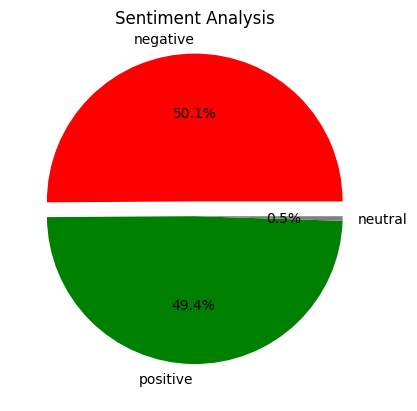

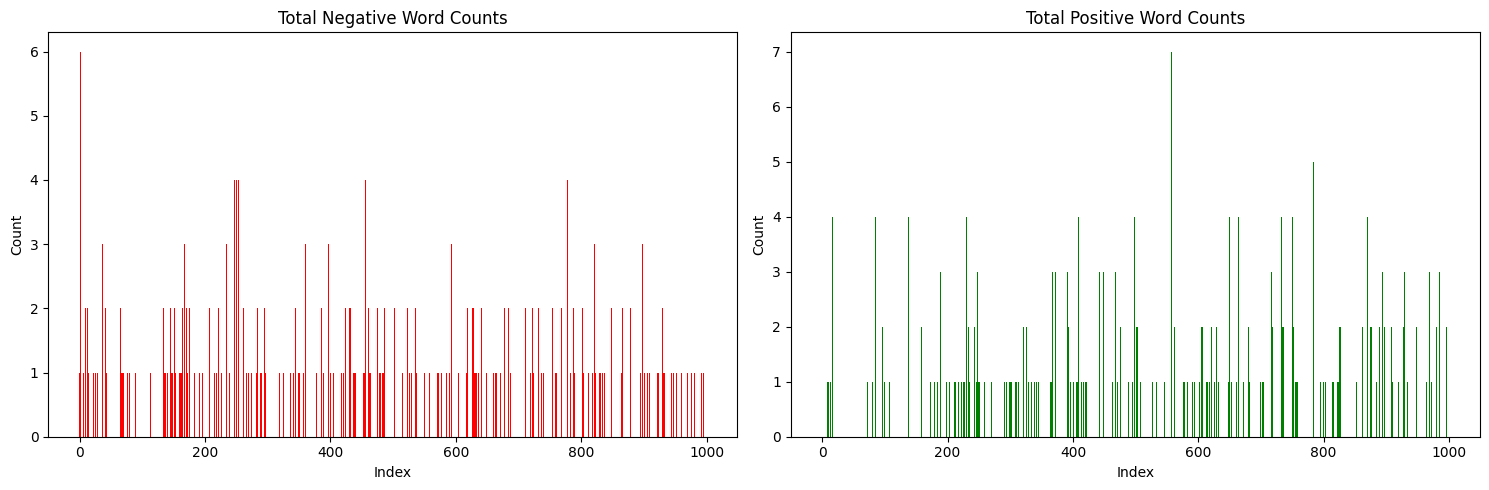

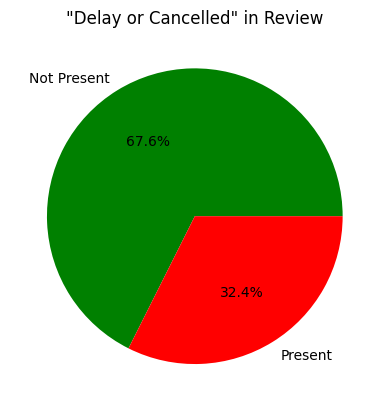

In [ ]:
import matplotlib.pyplot as plt

# Replace 'df' with your actual DataFrame containing sentiment analysis and word count columns

# Pie chart for sentiment analysis
sentiment_type_percentages = df1['SENTIMENT_TYPE'].value_counts(normalize=True) * 100
fig, ax = plt.subplots()
ax.pie(sentiment_type_percentages, labels=sentiment_type_percentages.index, colors=['red', 'green', 'grey'], explode=[0.1, 0, 0], autopct='%1.1f%%')
plt.title('Sentiment Analysis')
plt.show()

# Bar plots for word counts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Subplot for Total_Negative_Word_Counts
axes[0].bar(df1.index, df1['Total_Negative_Word_Counts'], color='red')
axes[0].set_title('Total Negative Word Counts')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Count')

# Subplot for Total_Positive_Word_Counts
axes[1].bar(df1.index, df1['Total_Positive_Word_Counts'], color='green')
axes[1].set_title('Total Positive Word Counts')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Pie chart for presence/absence of words related to delays
count_delay_word = df1['Delay_Occurrence'].value_counts()

# Mapping True/False to Yes/No labels
labels = {True: 'Present', False: 'Not Present'}
count_delay_word.index = count_delay_word.index.map(labels)

# Create a pie chart for presence/absence of words similar to 'delay' with updated labels
plt.pie(count_delay_word.values, labels=count_delay_word.index, colors=['green', 'red'], autopct='%1.1f%%')
plt.title('"Delay or Cancelled" in Review')
plt.show()
